# Settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# 본인 구글 드라이브에 업로드한 heart.csv 파일의 주소를 넣어주세요!
heart = pd.read_csv('/content/heart.csv')

# About Dataset
Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type  
 - Value 1: typical angina  
 - Value 2: atypical angina  
 - Value 3: non-anginal pain  
 - Value 4: asymptomatic  

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results  
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak : previous peak

slp : slope

caa: number of major vessels (0-3)

thall : Thal rate

output : 0= less chance of heart attack 1= more chance of heart attack

# 1. EDA

In [4]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# data shape
heart.shape

(303, 14)

In [6]:
# checking number of unique value
unique_heart = pd.DataFrame(index = heart.columns, columns = ['unique count'])

for i in list(heart.columns):
  unique_heart.loc[i,'unique count'] = heart[i].value_counts().shape[0]

unique_heart

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## Seperating the columns by categorical and numerical

In [7]:
# Seperating the columns by categorical and numerical
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [8]:
# numerical statistics
heart[num_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [9]:
# missing value
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Visualization

### categorical plotting

In [10]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

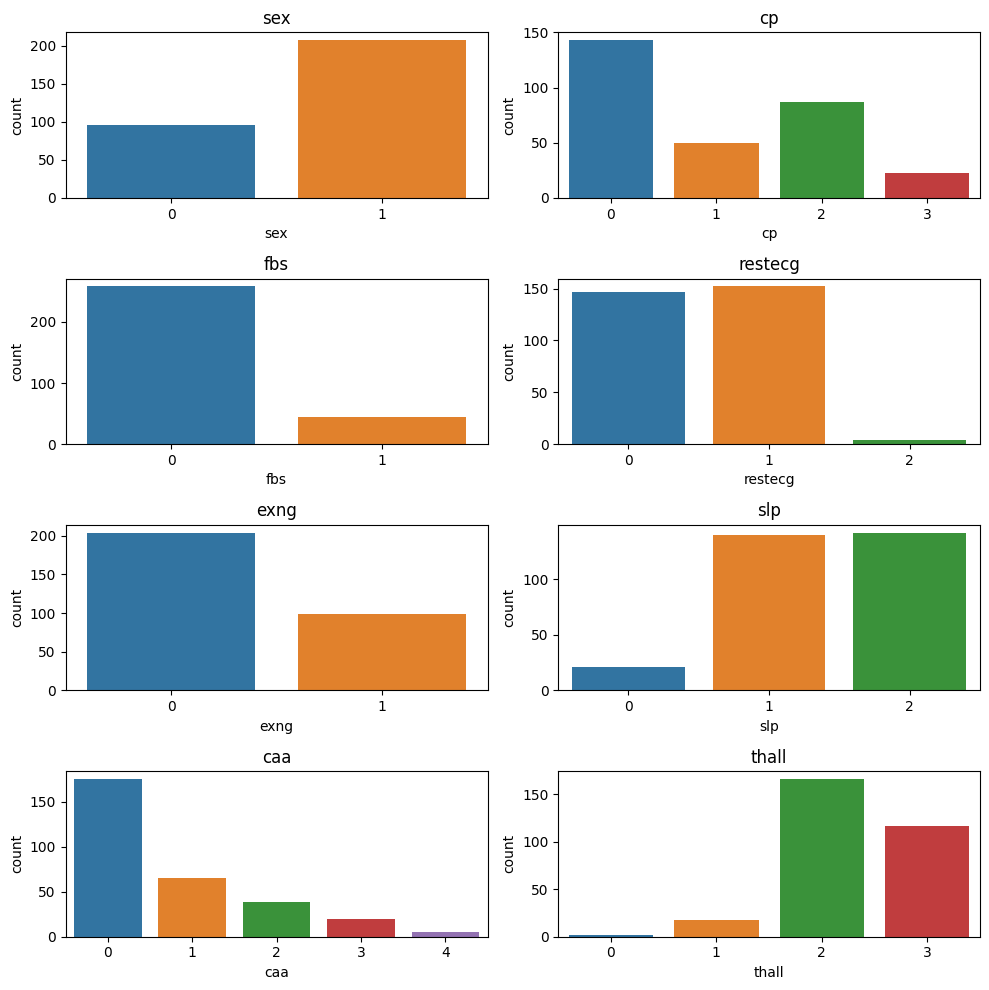

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
  sns.countplot(data = heart, x = cat_cols[i], ax = ax)
  ax.set_title(f'{cat_cols[i]}')

plt.tight_layout()
plt.show()

### numerical plotting

In [12]:
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

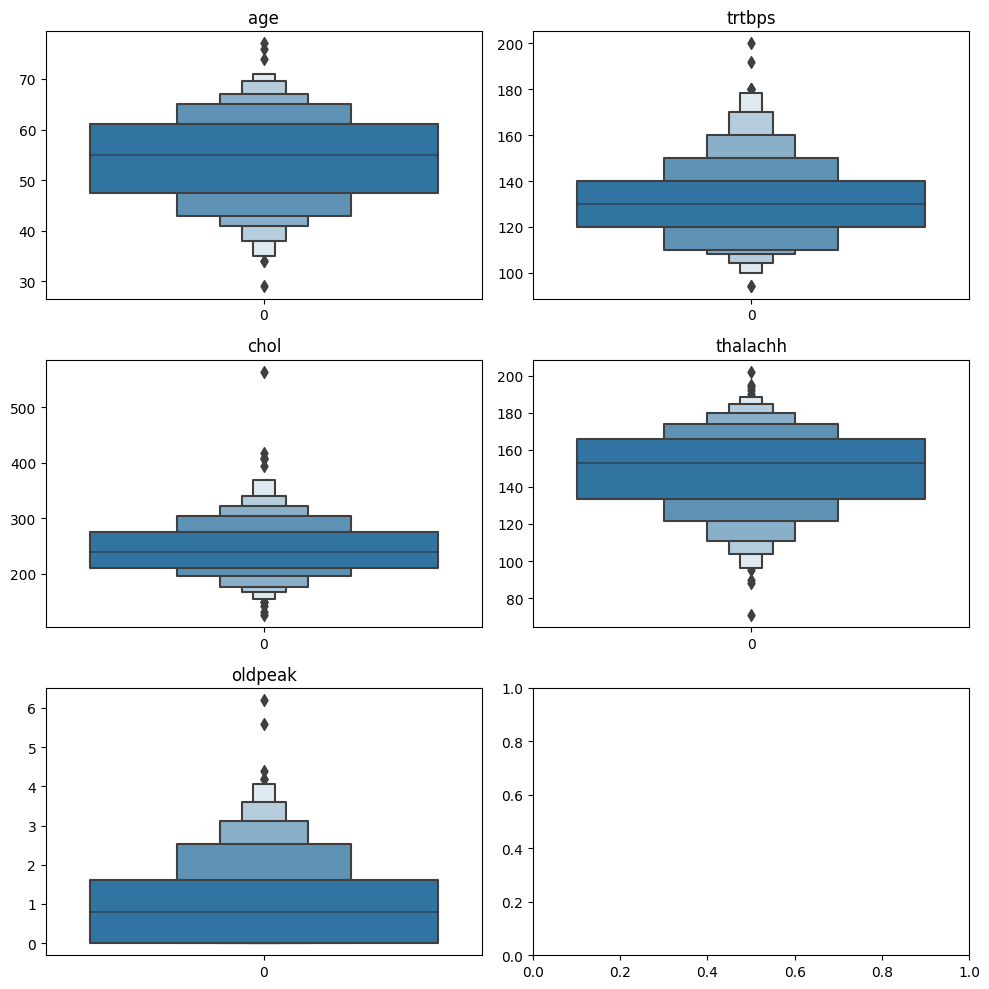

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()): #enumerate : 카운트와 object 함께 보여줌 -> (0,item1),(1,item2) ... 꼴
  if i == 5:
    break
  sns.boxenplot(heart[num_cols[i]], ax = ax)
  ax.set_title(f'{num_cols[i]}')


plt.tight_layout()
plt.show()

### target plotting

<Axes: xlabel='output', ylabel='count'>

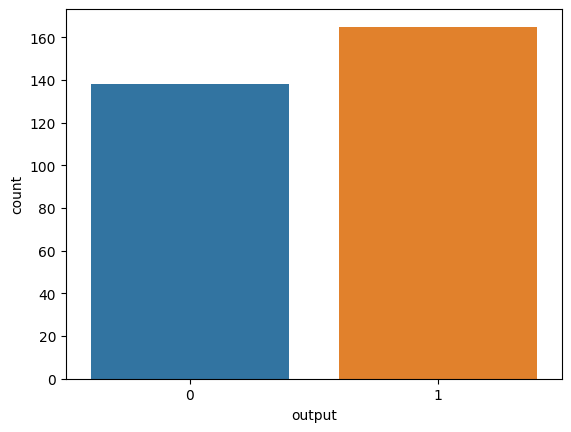

In [14]:
sns.countplot(data = heart,x = 'output')

## correlation matrix

<Axes: >

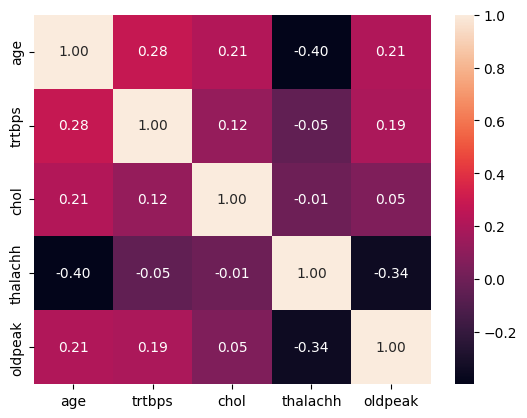

In [15]:
# numerical
heart_corr = heart[num_cols].corr()
sns.heatmap(heart_corr, fmt='.2f',annot = True)

<Axes: >

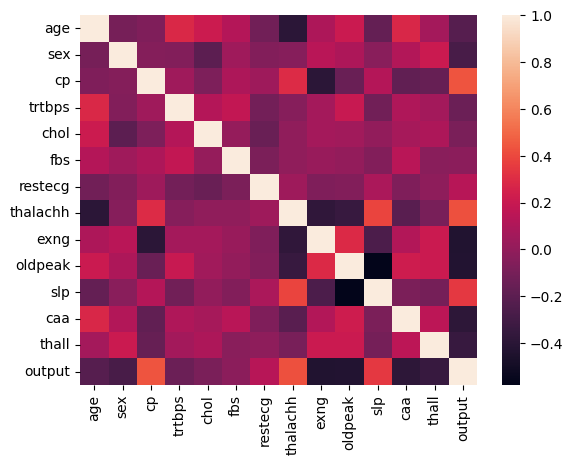

In [16]:
# all
heart_corr = heart.corr()
sns.heatmap(heart_corr, fmt='.2f',annot = False)

# preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
prep_heart = heart.copy()

# encoding categorical features
prep_heart = pd.get_dummies(prep_heart, columns = cat_cols, drop_first = True)

# scaling
scaler = StandardScaler()
prep_heart[num_cols] = scaler.fit_transform(prep_heart[num_cols])

# split X,y
X = prep_heart.drop(['output'], axis = 1)
y = prep_heart['output']

In [28]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Training

## Logistic Regression

### Q1. 아래 시그모이드 함수를 구현하세요

$\sigma(z) = \frac{1}{1 + e^{-z}}$


In [29]:
# Sigmoid 함수 정의
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Q.2 Cross Entropy를 구현하세요.

In [30]:
# Binary Cross Entropy 정의
def BCE(y,y_pred):
  return -sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))/len(y)

### Logistic Regression Model

In [31]:
# Logistic Regression model
def logistic_regression(X, y, num_iterations, learning_rate):
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Loss function
        cost = BCE(y,y_pred)
        cost_history.append(cost)

        gradient = np.dot(X.T, (y_pred - y)) / len(y)
        weights -= learning_rate * gradient

    return weights, cost_history

In [32]:
num_iterations = 10000
learning_rate = 0.01

weights, cost_history = logistic_regression(X_train, y_train, num_iterations, learning_rate)

print('Weights:', weights)
print('Final Cost:', cost_history[-1])

Weights: [ 0.05293664 -0.26835092 -0.07852607  0.33638329 -0.65871575 -0.91677142
  0.49887133  1.43812678  1.09054531  0.34738847  0.47143751  0.02420021
 -0.85299467 -0.13433424  0.7364544  -1.59062778 -1.42950524 -0.73335733
  0.25806157  0.26849969  0.98642513 -0.53499428]
Final Cost: 0.3213868414913261


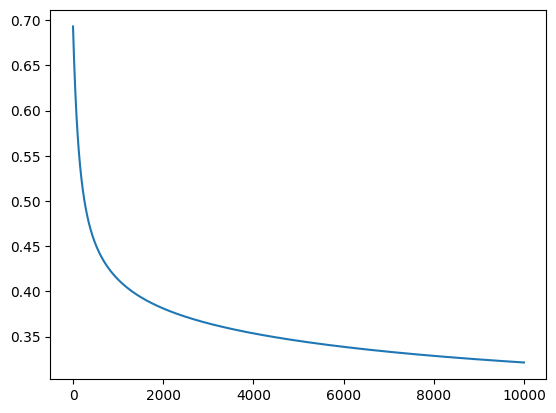

In [33]:
plt.plot(cost_history)

In [34]:
# Predict test data
z = np.dot(X_test, weights)
y_pred = np.round(sigmoid(z))

In [35]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [36]:
accuracy_score(y_test, y_pred)

0.8852459016393442

## KNN classification

### Q3. 거리 계산 함수에 대해 구현해보세요

In [43]:
def euclidean_distance(x1, x2):
  d = 0
  for i in range(len(x1)):
    d += (abs(x1[i]-x2[i]))**2
  return d**(1/2)

def manhattan_distance(x1, x2):
  d = 0
  for i in range(len(x1)):
    d += abs(x1[i]-x2[i])
  return d

In [44]:
# KNN 분류기 구현
def KNN(X_train, y_train, X_test, k):
    y_pred = []

    for test_sample in X_test.values:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in X_train.values]
        sorted_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[sorted_indices]
        unique_labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(label_counts)]
        y_pred.append(predicted_label)

    return np.array(y_pred)

In [45]:
k = 5
y_pred = KNN(X_train, y_train, X_test, k)

In [46]:
accuracy_score(y_test, y_pred)

0.8524590163934426

# Q4. sklearn의 Decision Tree를 사용해서 classification을 진행해보세요!

In [103]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV


dtc = DecisionTreeClassifier()
param={
    "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_depth":[2, 3, 4, 5, 6, None],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]
}
#min_samples_leaf : 다른 노드를 만들어 내기 위한 최소한의 샘플 수 조건 / max_depth : tree의 최대 깊이, default=None으로, 완벽하게 class가 분할될 때까지 진행
#min_samples_split : 각 노드가 가지고 있는 최소한의 샘플

gs = GridSearchCV(dtc, param_grid=param, cv=5)
gs.fit(X_train,y_train)

min_leaf = gs.best_params_['min_samples_leaf']
min_split = gs.best_params_['min_samples_split']
max = gs.best_params_['max_depth']

In [105]:
#최적의 parameter로 학습
dtc_opt = DecisionTreeClassifier(min_samples_leaf=min_leaf, min_samples_split=min_split, max_depth=max)
dtc_opt.fit(X_train,y_train)

#predict
y_pred = dtc_opt.predict(X_test)

참고 출처 : https://throwexception.tistory.com/1038

## Q5. 모델의 학습 결과에 대한 ROC curve를 그리고 AUC 값을 출력해보세요!

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

In [106]:
accuracy_score(y_test, y_pred)

0.7868852459016393

AUC : 0.8275862068965517


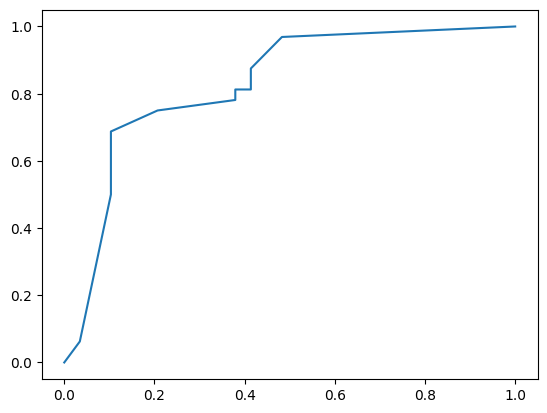

In [107]:
# calculating probability
y_prob = gs.predict_proba(X_test)[:,1]

# AUC
print('AUC : {}'.format(roc_auc_score(y_test, y_prob)))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC curve')
plt.show()

## Q6. Plot_tree를 이용해서 decision tree의 결과를 확인해 봅시다.

In [86]:
from sklearn.tree import plot_tree

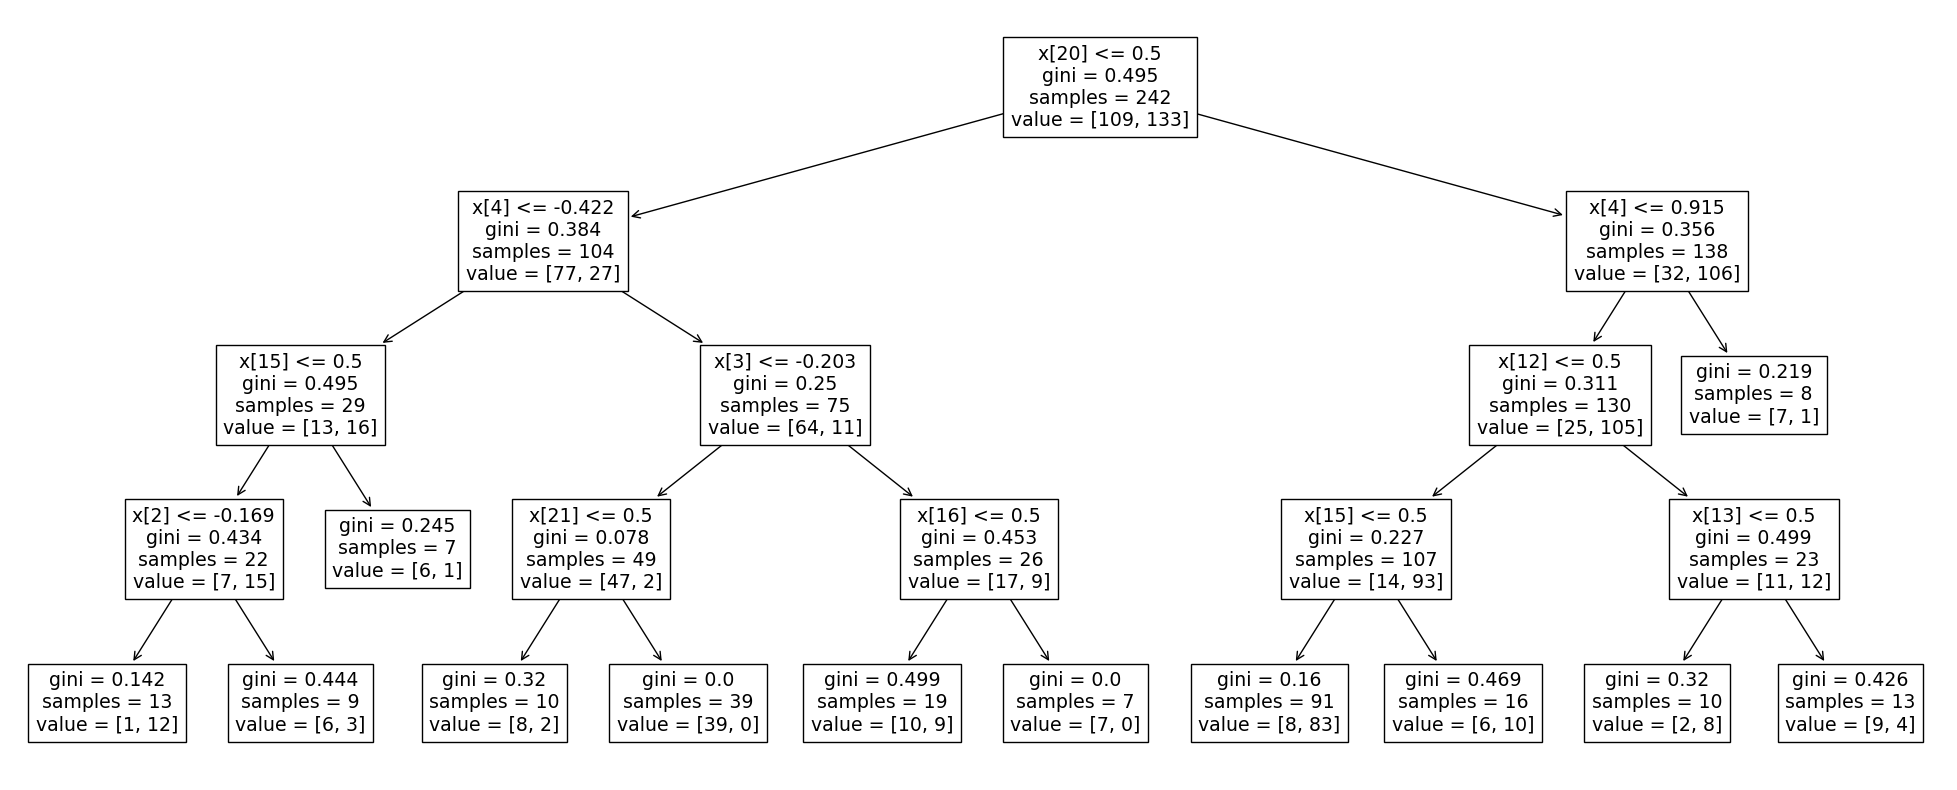

In [108]:
fig = plt.figure(figsize=(25,10))

plot_tree(dtc_opt)
plt.show()